# **STOCK MARKET CLUSTERING**

In this project I will be extracting live Stock Market data from yahoo finance. 

I will analize their performance since 2020 (beggining of Covid-19).

The purpose is to find similarities among various companies using their stock stock market prices and then group them into different clusters using the K-means algorithm.

This is an unsuppervised machine learning problem and I will use an unsuppervised machine learning technique with the help of the K-means algorithm.

## 1)Importing libraries

In [184]:
# pip install pandas_datareader

In [185]:
# pip install plotly

In [186]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

## 2)Defining companies to analyze

In [187]:
# pip install yfinance

In [188]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Netflix':'NFLX',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Tesla':'TSLA',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

## 3)Reading dataframe

In [189]:
import yfinance as yf
import pandas as pd
import datetime

start_date = '2019-01-01'
end_date = '2023-10-31'

symbols = list(companies_dict.values())  
attributes = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']  

dfs = []  

for symbol in symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    dfs.append(df)


combined_df = pd.concat(dfs, axis=1, keys=symbols, names=['Symbols'])
combined_df.columns = combined_df.columns.swaplevel(0, 1)


combined_df.reset_index(inplace=True)


df = combined_df.set_index('Date').sort_index(axis=1, level=0)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [190]:
df.head()

Adj Close                                                           
Symbols          AAPL       AMZN        AXP          BA        BAC        CVX   
Date                                                                            
2019-01-02  37.943256  76.956497  89.085655  314.645111  22.276142  89.766090  \
2019-01-03  34.163822  75.014000  87.346756  302.100525  21.919157  88.046860   
2019-01-04  35.622261  78.769501  91.282639  317.822571  22.829479  89.871513   
2019-01-07  35.542976  81.475502  91.778122  318.823425  22.811630  91.039352   
2019-01-08  36.220531  82.829002  92.226883  330.891937  22.767006  90.641945   

                                                       ...   Volume            
Symbols            F         GE        HMC        IBM  ...       MA      MCD   
Date                                                   ...                     
2019-01-02  6.351993  47.434505  23.749647  86.302307  ...  4294000  2571500  \
2019-01-03  6.255507  47.493443  23.426765  84.579391  ...  5070900  3728200   
2019-01-04  6.496721  48.495152  24.494068  87.882904  ...  4452900  3194300   
2019-01-07  6.665572  51.500328  24.951479  88.504631  ...  4219200  3283000   
2019-01-08  6.729896  50.439690  25.543427  89.763092  ...  5069700  2941400   

                                                                               
Symbols         MSFT      NFLX      PEP      TM       TSLA      VLO      WBA   
Date                                                                           
2019-01-02  35329300  11679500  4835400  169900  174879000  4271900  5528100  \
2019-01-03  42579100  14969600  5975900  309500  104478000  3300800  5853200   
2019-01-04  44060600  19330100  6293900  307500  110911500  4364500  6868600   
2019-01-07  35656100  18620100  5220300  156100  113268000  3833600  6192500   
2019-01-08  31514400  15359200  6407700  150400  105127500  3087700  6548100   

                      
Symbols          XOM  
Date                  
2019-01-02  16727200  
2019-01-03  13866100  
2019-01-04  16043600  
2019-01-07  10844200  
2019-01-08  11439000  

[5 rows x 144 columns]

In [191]:
df.isna().sum()

           Symbols
Adj Close  AAPL       0
           AMZN       0
           AXP        0
           BA         0
           BAC        0
                     ..
Volume     TM         0
           TSLA       0
           VLO        0
           WBA        0
           XOM        0
Length: 144, dtype: int64

### a) Metrics

In [192]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [193]:
# Movement is the difference of opening and closing prices of a particular day. 
# Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [194]:
sum_of_movement = np.sum(movements,1) #sum of differences of closing and opening prices of all days.

In [195]:
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:141.82221221923828
company:AMZN, Change:-51.009559631347656
company:AXP, Change:-28.23009490966797
company:BA, Change:-202.43054962158203
company:BAC, Change:-7.22999382019043
company:CVX, Change:-12.75
company:F, Change:-3.9200072288513184
company:GE, Change:6.573291778564453
company:HMC, Change:-3.8900012969970703
company:IBM, Change:42.42607879638672
company:INTC, Change:14.669916152954102
company:JNJ, Change:-1.5100555419921875
company:KO, Change:-23.59002685546875
company:LMT, Change:32.580291748046875
company:MA, Change:63.03096008300781
company:MCD, Change:-7.749847412109375
company:MSFT, Change:88.65007019042969
company:NFLX, Change:103.06983947753906
company:PEP, Change:-29.699928283691406
company:TM, Change:-63.17012023925781
company:TSLA, Change:-81.6567611694336
company:VLO, Change:-24.139991760253906
company:WBA, Change:-56.92000198364258
company:XOM, Change:16.77989959716797


### b) Choosing companies to analyze

In [196]:
# I will choose Tesla and Apple

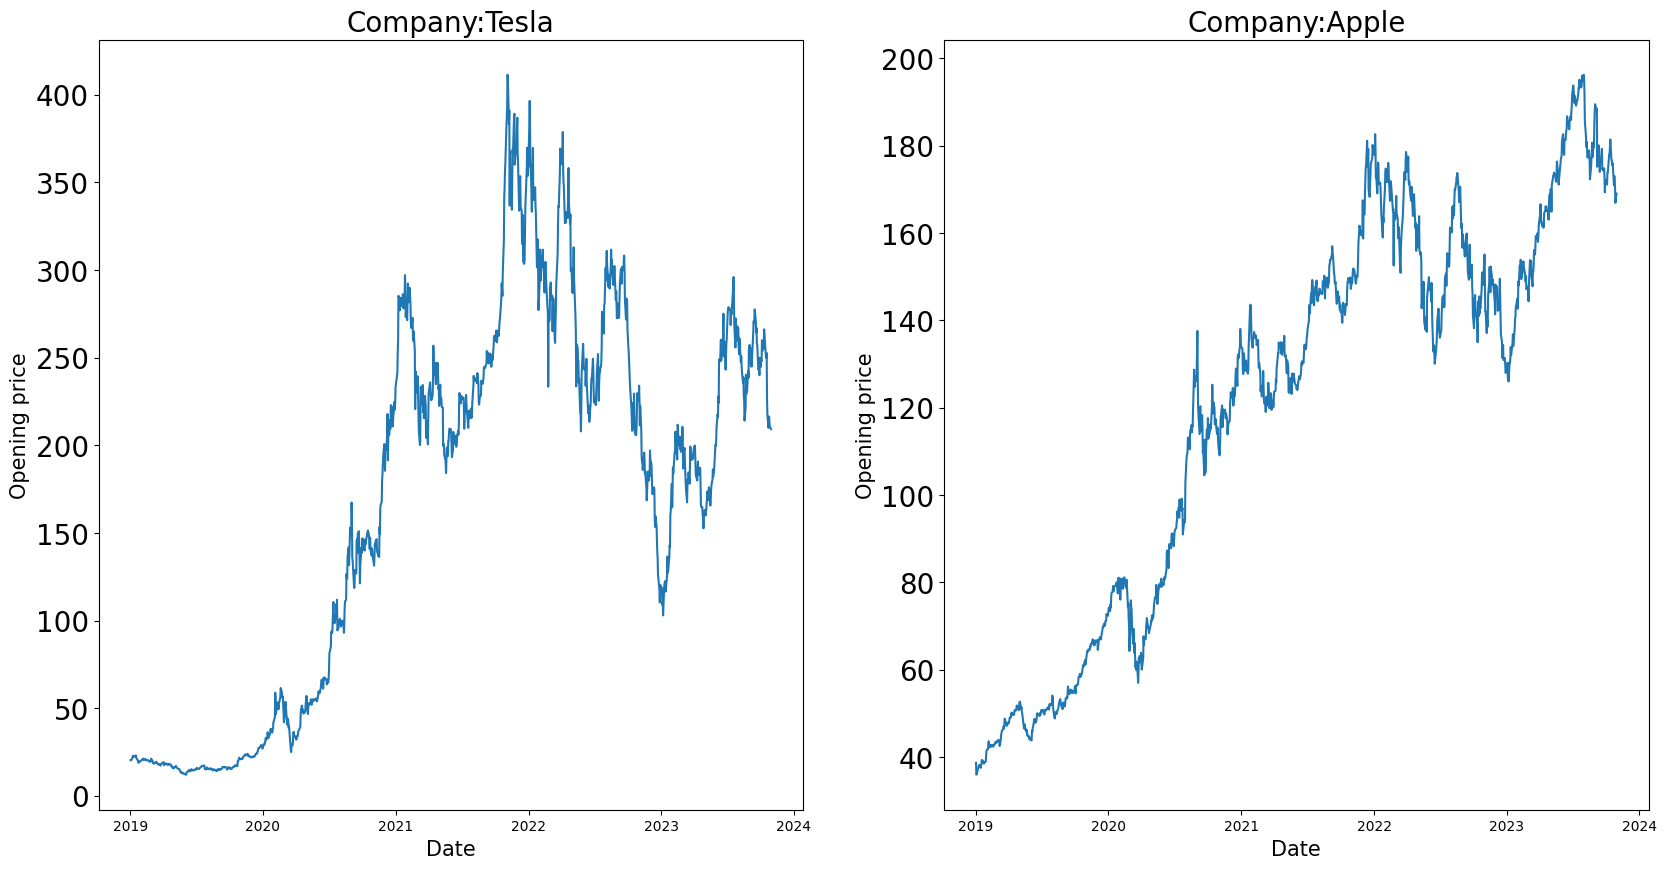

In [197]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)

plt.title('Company:Tesla',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['TSLA'])
plt.subplot(1,2,2)

plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

### c) Analyzing opening and closing prices

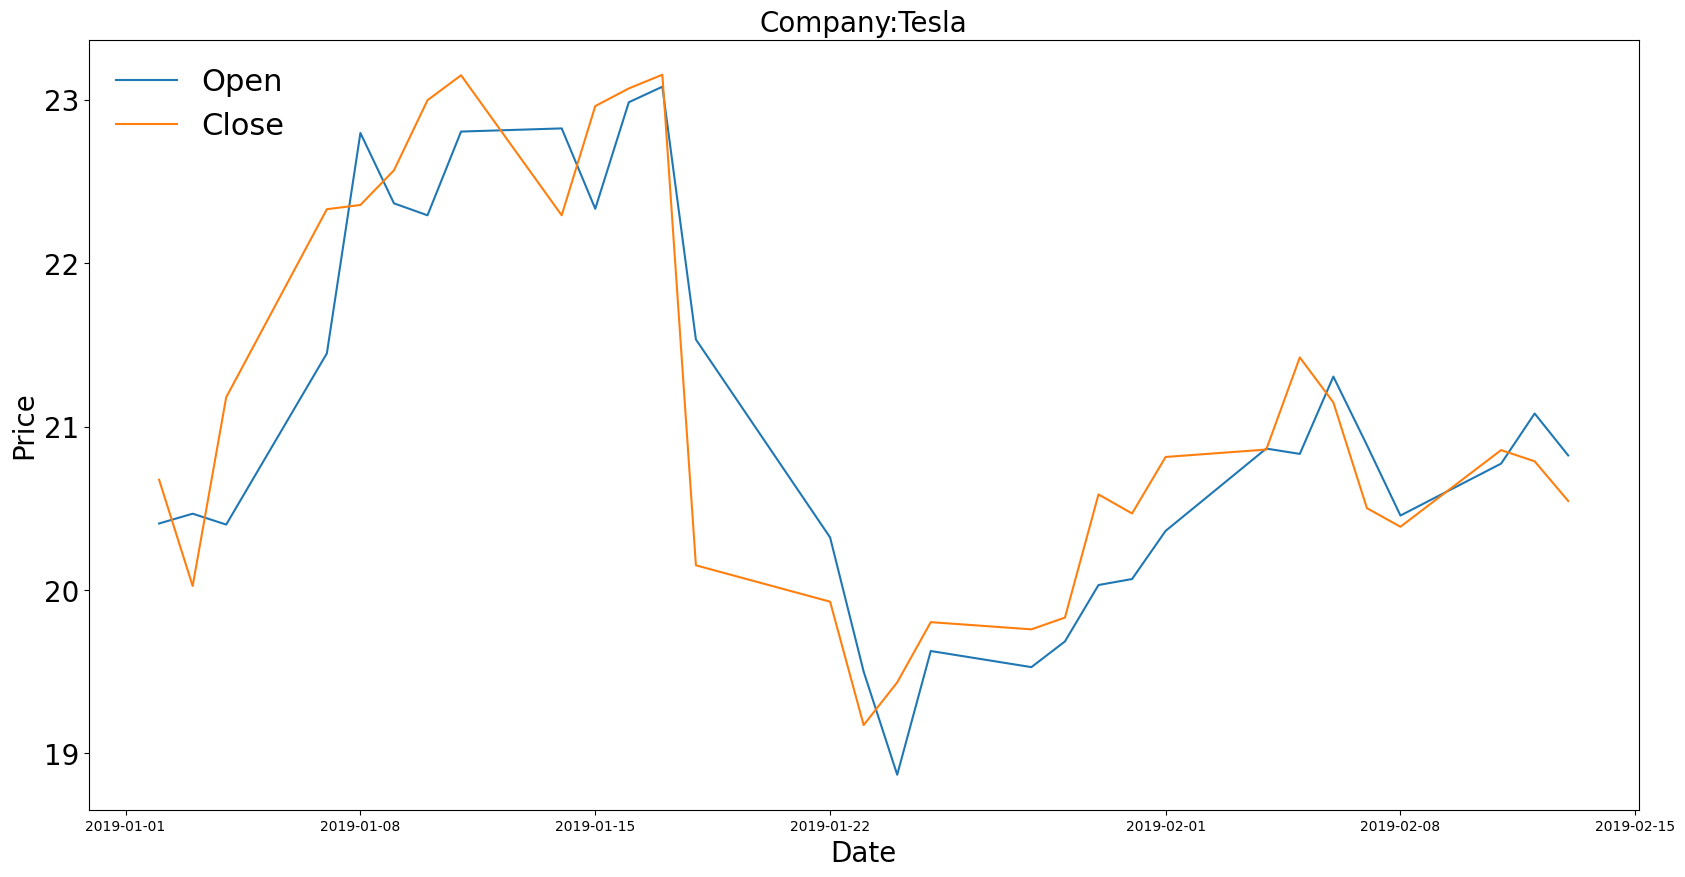

In [198]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Tesla',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['TSLA'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['TSLA'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

#### d) Analyzing movements and volatility

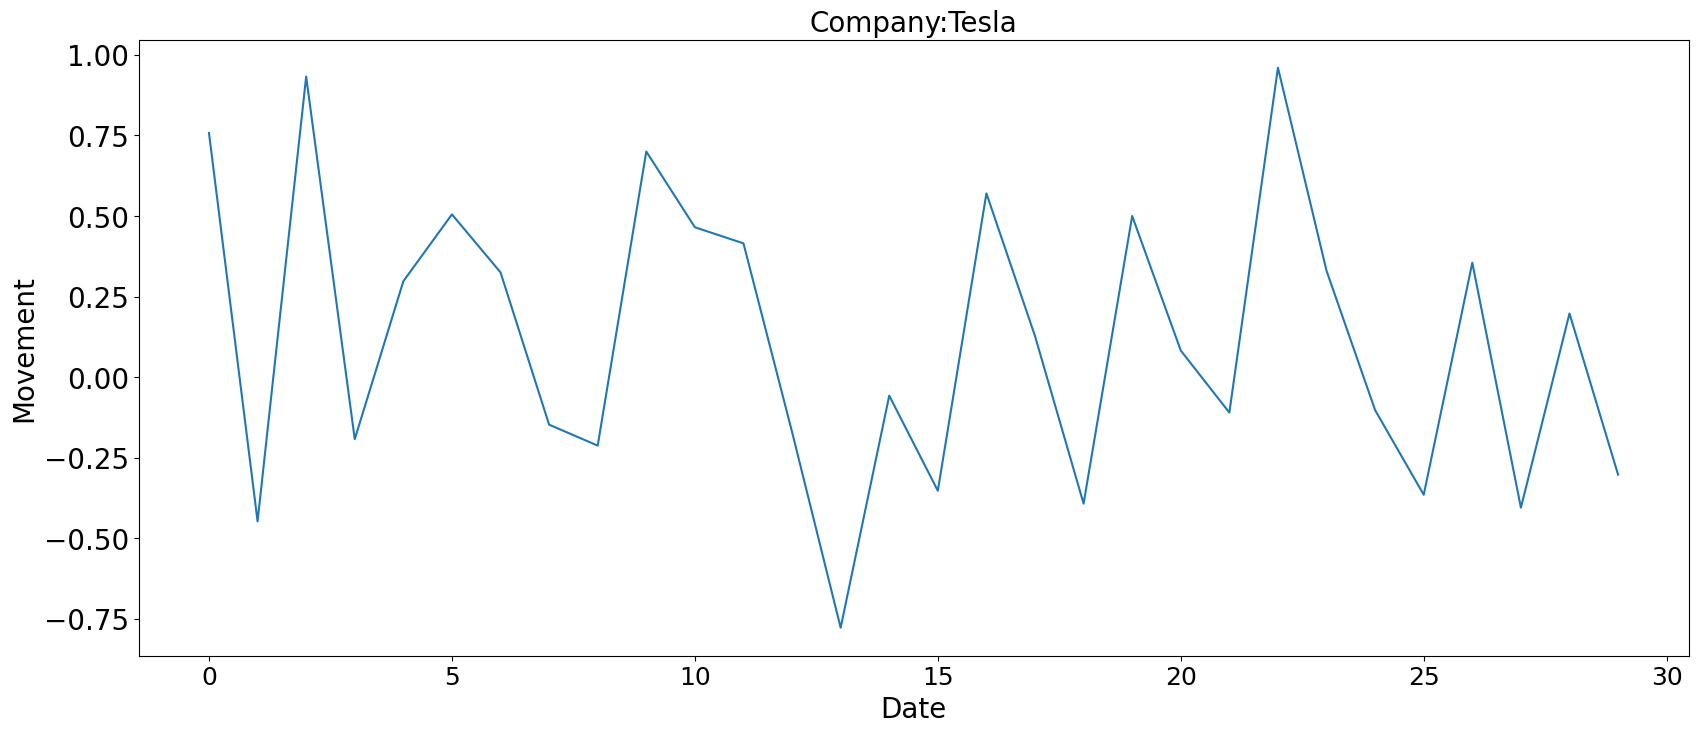

In [199]:
plt.figure(figsize = (20,8))
plt.title('Company:Tesla',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

#### e) Volume of negotiation

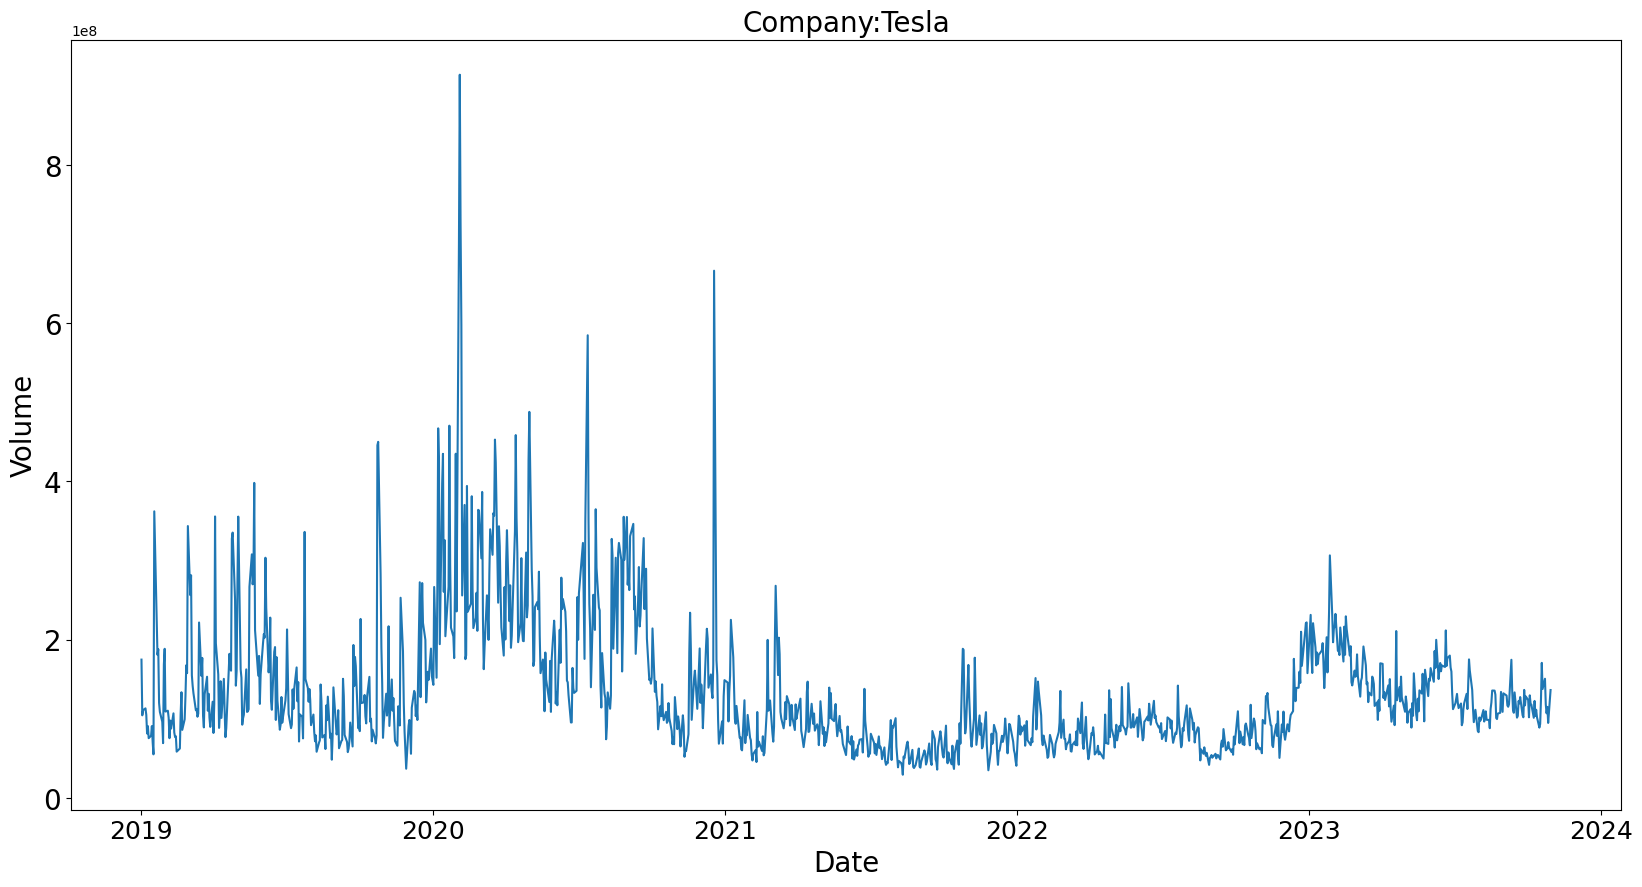

In [200]:
plt.figure(figsize = (20,10))
plt.title('Company:Tesla',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['TSLA'],label = 'Open')

The peaks sugest there are high volumes of stocks traded on certain days. 

This may be due to several situations which may affect the image of the company positively or negatively.

In this particular case, the beggining of the pandemic was an interesting event of sellers and buyers.

## 4)Normalization

Stock prices of the chosen stocks have different scales. There is a significant difference in the rate of change of units in stock price of each one and in that case we need to normalize our data in order to have consistency in our data for further analysis.

In [201]:
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
movements_imputed = imputer.fit_transform(movements)

normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements_imputed)


In [202]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.25165759829746975
0.211432002873957
-0.00015026107608549847


Now we have similiar Normalized movements of Tesla and Apple.

## 5)Creating a pipeline

In [203]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer  

imputer = SimpleImputer(strategy='mean')
movements_imputed = imputer.fit_transform(movements)

normalizer = Normalizer()

# Create Kmeans model
kmeans = KMeans(n_clusters=6, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to daily stock movements 
pipeline.fit(movements_imputed)

# Predict clusters
predictions = pipeline.predict(movements_imputed)


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The companies and their respective clusters are displayed below

In [204]:
df1 = pd.DataFrame({'Cluster':predictions,'companies':list(companies_dict)})

In [205]:
df1

,Cluster,companies
0,2,Amazon
1,2,Apple
2,1,Walgreen
3,4,Netflix
4,1,Boeing
5,3,Lockheed Martin
6,5,McDonalds
7,4,Intel
8,5,IBM
9,5,Tesla


Identifying clusters

In [206]:
df1[df1['Cluster']==0]

,Cluster,companies
11,0,Microsoft
12,0,General Electrics
13,0,American Express
15,0,Coca Cola
18,0,Honda


In [207]:
df1[df1['Cluster']==1]

,Cluster,companies
2,1,Walgreen
4,1,Boeing
14,1,Pepsi


In [208]:
df1[df1['Cluster']==2]

,Cluster,companies
0,2,Amazon
1,2,Apple
10,2,MasterCard
16,2,Johnson & Johnson
17,2,Toyota
20,2,Chevron


In [209]:
df1[df1['Cluster']==3]

,Cluster,companies
5,3,Lockheed Martin
21,3,Valero Energy
23,3,Bank of America


In [210]:
df1[df1['Cluster']==4]

,Cluster,companies
3,4,Netflix
7,4,Intel


In [211]:
df1[df1['Cluster']==5]

,Cluster,companies
6,5,McDonalds
8,5,IBM
9,5,Tesla
19,5,Exxon
22,5,Ford


## 6)Dimension Reduction - Principal Component Analysis(PCA)

In [212]:
norm_movements.shape

(24, 1216)

In [213]:
# It seems like we have too much columns/attributes, so we will use a technique for dimension reduction

In [214]:
from sklearn.decomposition import PCA

imputer = SimpleImputer(strategy='mean')
movements_imputed = imputer.fit_transform(movements)

normalizer = Normalizer()

# Reduce the data
reduced_data = PCA(n_components=2)

# Create Kmeans model
kmeans = KMeans(n_clusters=6, max_iter=1000)

# Make a pipeline chaining normalizer, pca, and kmeans
pipeline = make_pipeline(normalizer, reduced_data, kmeans)

# Fit pipeline to daily stock movements (usando los datos imputados)
pipeline.fit(movements_imputed)

# Predict clusters
predictions = pipeline.predict(movements_imputed)

# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels': predictions, 'companies': list(companies_dict.keys())}).sort_values(by=['labels'], axis=0)


c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [215]:
df1 = pd.DataFrame({'Clusters':predictions,'companies':list(companies_dict)}).sort_values(by=['Clusters'],axis = 0)
df1

,Clusters,companies
2,0,Walgreen
3,0,Netflix
4,0,Boeing
6,0,McDonalds
7,0,Intel
8,0,IBM
0,1,Amazon
1,1,Apple
20,1,Chevron
17,1,Toyota


## 7)Plotting the Decision Boundary

<Figure size 640x480 with 0 Axes>

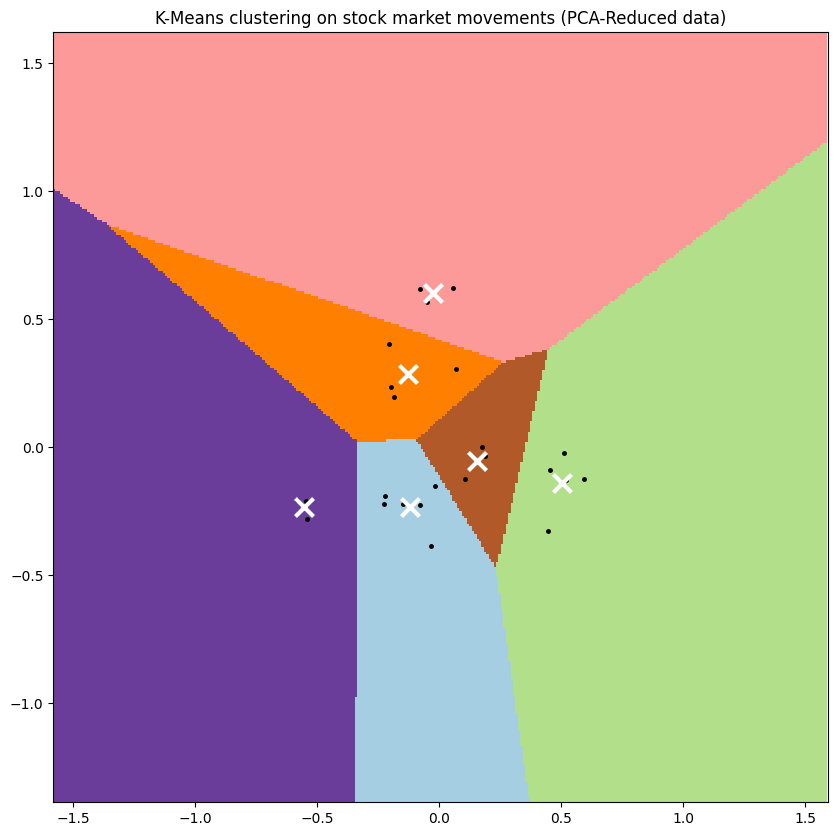

In [216]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()